# <font color=blue>SVD and low rank approximation</font>

## <font color=deepskyblue>1. Singular value decomposition</font>

Let $\mathbb{K}$ denote $\mathbb{R}$ or $\mathbb{C}$, and let $A \in \mathbb{K}^{m{\times}n}$. Set $r=\operatorname{rank}(A)$ for short. We state well-known facts. 

1. $\operatorname{rank}(A^\ast{A})=\operatorname{rank}(AA^\ast)=\operatorname{rank}(A)$.


2. $A^\ast{A}\geqq0$


3. There exist positive numbers $\sigma_1 \geqq \dotsc \geqq \sigma_r >0$ such that 

$$
\det(zE_n-A^\ast{A})
=
(z-\sigma_1^2)\dotsc(z-\sigma_r^2)z^{n-r}.
$$

4. There exist an orthonormal system $\{u_1,\dotsc,u_m\}$ of $\mathbb{K}^m$ and an orthonormal system $\{v_1,\dotsc,v_n\}$ of $\mathbb{K}^n$ such that 

$$
A
=
U{\Sigma}V^\ast
=
\sum_{l=1}^r
\sigma_l u_l v_l^\ast. 
$$

5. $U{\Sigma}V^\ast$ is said to be the singular value decomposition of $A$, where $U$ and $V$ are unitary matrices and $\Sigma$ is a rectangular diagonal matrix of the form 

$$
U=[u_1,\dotsc,u_m],
\quad
V=[v_1,\dotsc,v_n],
\quad
\Sigma
=
\begin{bmatrix}
\sigma_1 & & & 
\\
& \ddots & &
\\
& & \sigma_r & 
\\
& & & 
\end{bmatrix}.
$$

## <font color=deepskyblue>2. Low rank approximation</font>

Let $A \in \mathbb{K}^{m{\times}n}$, and let $r=\operatorname{rank}(A)$. 
Suppose that the SVD of $A$ is given by 

$$
A=\displaystyle\sum_{l=1}^r\sigma_l u_l v_l^\ast.
$$

Set 

$$
A_k:=\sum_{l=1}^k\sigma_l u_l v_l^\ast,
\quad
k=1,\dotsc,r.
$$

Then $\operatorname{rank}(A_k)=k$. It is well-known that $A_k$ is the best approximation of $A$ among $m{\times}n$ matrices with rank $k$. More precisely we have the Eckart-Young inequality of the form

$$
\lVert{A-B}\rVert
\geqq
\lVert{A-A_k}\rVert,
\quad
B\in\mathbb{K}^{m{\times}n}, 
\ 
\operatorname{rank}(B)=k, 
$$

where $\lVert\cdot\rVert$ is the spectral norm of matrices defined by 

$$
\lVert{B}\rVert
:=
\max_{\substack{x \in \mathbb{K}^n \\ x\ne0}}
\frac{\lvert{Bx}\rvert}{\lvert{x}\rvert}, 
$$

and $\lvert\cdot\rvert$ is the standard norm of numeric vectors. The same inequlity holds if we replace the spectral norm by the Frobenius norm or the nuclear norm. 

## <font color=magenta>3. An example of low rank approximation</font>

We show the approximation of an RGB image which is a triple of three matrices of the same size, using the best low rank approximation based on the SVD.

In [1]:
# packages
using LaTeXStrings
using Plots
using Colors 
using ImageFiltering
using Images
using ImageMagick
using TestImages
using ImageView
using ImageTransformations
using LinearAlgebra
using LowRankApprox

In [2]:
# uploading image file
I=load("char_kway_teow.jpg");

# resize
X=imresize(I, ratio=1/4);
(p,q)=size(X);

# splitting an RGB image into R, G and B 
A=channelview(X);
R=Array{Float64}(A[1,:,:]);
G=Array{Float64}(A[2,:,:]);
B=Array{Float64}(A[3,:,:]);

In [3]:
# SVD of R, G and B
RU, RS, RV=psvd(R);
GU, GS, GV=psvd(G);
BU, BS, BV=psvd(B);

In [4]:
# low rank matrices of R, G and B
rank=60;
DR=zeros(p,q,rank);
DG=zeros(p,q,rank);
DB=zeros(p,q,rank);
for r=1:rank
    DR[:,:,r]=sum(RS[n]*RU[1:p,n]*(RV[1:q,n])' for n=1:r);
    DG[:,:,r]=sum(GS[n]*GU[1:p,n]*(GV[1:q,n])' for n=1:r);
    DB[:,:,r]=sum(BS[n]*BU[1:p,n]*(BV[1:q,n])' for n=1:r);
end

In [7]:
# combining low rank R, G and B 
Y=zeros(3,p,q,rank+16);
Z=zeros(p,q)

# 1-4 original
for r=1:4
    Y[1,:,:,r]=R;
    Y[2,:,:,r]=G;
    Y[3,:,:,r]=B;
end

# 5-8 blank
for r=5:8
    Y[1,:,:,r]=Z;
    Y[2,:,:,r]=Z;
    Y[3,:,:,r]=Z;
end

# 9-68 rank 1-60
for r=9:rank+8
    Y[1,:,:,r]=DR[:,:,r-8];
    Y[2,:,:,r]=DG[:,:,r-8];
    Y[3,:,:,r]=DB[:,:,r-8];
end

# 69-72 blank
for r=rank+9:rank+12
    Y[1,:,:,r]=Z;
    Y[2,:,:,r]=Z;
    Y[3,:,:,r]=Z;
end

# 73-76 original
for r=rank+13:rank+16
    Y[1,:,:,r]=R;
    Y[2,:,:,r]=G;
    Y[3,:,:,r]=B;
end

┌ Info: Saved animation to 
│   fn = C:\Users\hiroy\Dropbox\Julia\jupyter\animation_svd_char_kway_teow.gif
└ @ Plots C:\Users\hiroy\.julia\packages\Plots\rDbWY\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\hiroy\\Dropbox\\Julia\\jupyter\\animation_svd_char_kway_teow.gif")
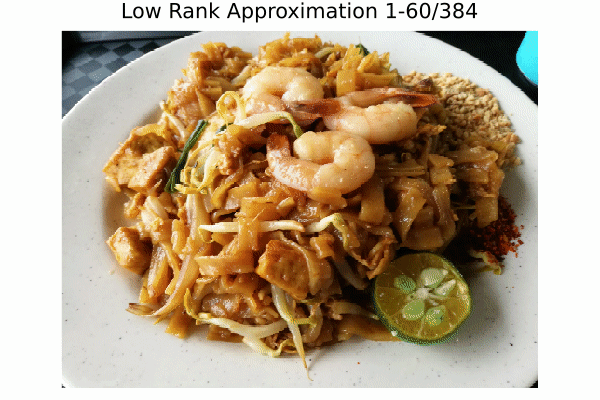

In [6]:
# creating animation
anim1 = @animate for r=1:rank+16
    plot(colorview(RGB,Y[:,:,:,r]),
         title="Low Rank Approximation 1-60/384",
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false)
end
gif(anim1, "animation_svd_char_kway_teow.gif", fps = 4)	